# Demo of Cleaning Functions

This notebook has the purpose to showcase (and test!) the functions defined in `cleaning_functions.py`. These functions are designed for cleaning Pandas DataFrames in Python 3.*.

### Load necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import cleaning_functions

# for testing purpose only
import time
# start = time.time()
# print('Duration: {} seconds'.format(time.time() - start))

In [2]:
test_df = pd.read_csv('_data/realWorldTestData.csv', low_memory=False, parse_dates=True)

### Have quick look at DataFrame content and structure

In [3]:
test_df.head(5)

,car_nr,ref_dt,target_event,NUM_CONSEC_SERVICES,SUM_INVOICE_AMOUNT_IN_SERVICE,SUM_INVOICE_AMOUNT,NUM_EVENTS,FIRST_EVT,LAST_EVT,LAST_MILEAGE,...,Fahrzeugart,Altersklasse5J,Kanton,WEMFWirtschaftsgebiet,Altersklasse1J,PARTNER_LAT,PARTNER_LNG,PARTNER_ADDRESS,dist_metres,dist_seconds
0,13845534.0,2015-09-13 00:00:00.0000000,CHURN,1,0.0,286.45,8,2009-02-23 00:00:00.0000000,2014-04-08 00:00:00.0000000,79790.0,...,0.0,1.0,14.0,42.0,24.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
1,13845535.0,2015-12-02 00:00:00.0000000,ACTIVE,5,0.0,0.00,10,2009-02-24 00:00:00.0000000,2014-08-04 00:00:00.0000000,48670.0,...,6.0,8.0,14.0,42.0,58.0,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
2,13845526.0,2016-04-06 00:00:00.0000000,CHURN,1,0.0,0.00,5,2009-02-23 00:00:00.0000000,2014-06-06 00:00:00.0000000,53000.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
3,13845518.0,2016-08-08 00:00:00.0000000,CHURN,1,0.0,0.00,6,2009-02-26 00:00:00.0000000,2014-10-13 00:00:00.0000000,49000.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0
4,13851980.0,2015-11-29 00:00:00.0000000,CHURN,3,0.0,0.00,14,2009-10-13 00:00:00.0000000,2014-01-29 00:00:00.0000000,56145.0,...,NaN,NaN,NaN,NaN,NaN,47.699836,8.633246,"Spitalstrasse 27, 8200 Schaffhausen, Switzerland",2805.0,302.0


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56778 entries, 0 to 56777
Data columns (total 82 columns):
car_nr                           56778 non-null float64
ref_dt                           56778 non-null object
target_event                     56778 non-null object
NUM_CONSEC_SERVICES              56778 non-null int64
SUM_INVOICE_AMOUNT_IN_SERVICE    56778 non-null float64
SUM_INVOICE_AMOUNT               56778 non-null float64
NUM_EVENTS                       56778 non-null int64
FIRST_EVT                        56778 non-null object
LAST_EVT                         56778 non-null object
LAST_MILEAGE                     56777 non-null float64
MEAN_MILEAGE_PER_MNTH            56778 non-null float64
AVG_DIFF_MNTH                    56778 non-null int64
age_mnth                         56778 non-null int64
KANTON_LICENCE_PLATE             55490 non-null object
INSPECTION_INTERVAL_UID          56778 non-null object
LIST_PRICE                       56777 non-null float64
END_CUSTO

In [5]:
# call function to count columns with different datatypes
cleaning_functions.count_dtypes(test_df)

Total number of columns: 82
- Columns with dtype numerical: 42
- Columns with dtype object: 40


### Edit column names

In [6]:
# call function to have more uniform column names
cleaning_functions.edit_column_names(test_df)

In [7]:
# check
test_df.columns

Index(['car_nr', 'ref_dt', 'target_event', 'num_consec_services',
       'sum_invoice_amount_in_service', 'sum_invoice_amount', 'num_events',
       'first_evt', 'last_evt', 'last_mileage', 'mean_mileage_per_mnth',
       'avg_diff_mnth', 'age_mnth', 'kanton_licence_plate',
       'inspection_interval_uid', 'list_price', 'end_customer_status_uid',
       'accident_car', 'car_brand_uid', 'description_de', 'description_de2',
       'fuel_type_uid', 'gear_type_uid', 'wheel_drive_uid',
       'number_of_doors_uid', 'gear_count', 'exterior_color_de',
       'interior_color_de', 'base_margin', 'budget_type_import', 'sales_type',
       'sales_type_import', 'car_owner_join_nr', 'function_type_uid',
       'person_language_uid', 'title', 'position', 'evt_birth',
       'person_street', 'person_state', 'person_zip_code', 'person_city',
       'person_adress_count', 'ownerage', 'partner_company_nr', 'name',
       'active', 'region_uid', 'sector_uid', 'partner_language_uid',
       'is_retail_pa

### Change datatypes

In [8]:
test_test = test_df.copy()

# assign the columns to be changed to the respective list of column names
cols_to_category = ['fuel_type_uid', 'gear_type_uid']
cols_to_object = ['car_nr']
cols_to_integer = ['sum_invoice_amount_in_service']
cols_to_float = ['avg_diff_mnth']
cols_to_datetime = ['first_evt', 'last_evt']

# call the function
cleaning_functions.change_dtypes(test_df, cols_to_category=cols_to_category, 
                                 cols_to_object=cols_to_object, cols_to_integer=cols_to_integer,
                                 cols_to_float=cols_to_float, cols_to_datetime=cols_to_datetime, 
                                 datetime_pattern='%Y/%m/%d')

In [9]:
# check
cleaning_functions.count_dtypes(test_df)

Total number of columns: 82
- Columns with dtype numerical: 41
- Columns with dtype categorical: 2
- Columns with dtype object: 37
- Columns with dtype datetime: 2


### Delete columns

I like to delete columns in multiple steps during EDA. To have a complete list of all deleted records in the end I proceed as shown in the next few cells.

In [10]:
# assign the columns to be deleted
cols_to_delete = ['EVT_BIRTH', 'NAME']

#call the function
cleaning_functions.delete_columns(test_df, cols_to_delete=cols_to_delete)

In [11]:
# append more columns to delete
for col in ['RATING_UID', 'dist_seconds']:
    cols_to_delete.append(col)

# call the function again
cleaning_functions.delete_columns(test_df, cols_to_delete=cols_to_delete)

'dist_seconds successfully deleted'

In [12]:
# look at complete list of all deleted columns
cols_to_delete

['EVT_BIRTH', 'NAME', 'RATING_UID', 'dist_seconds']

In [13]:
#test
test_df.shape[1]

81

### Handle Missing Values

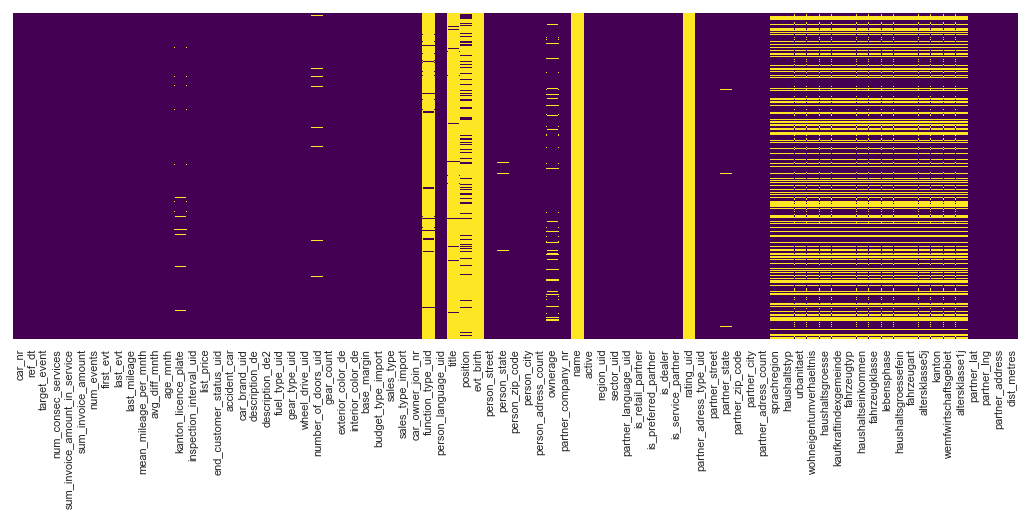

In [14]:
# call function to plot with heatmap showing missing values
cleaning_functions.plot_NaN(test_df)

In [15]:
# call function to show columns containing missing values und respective number of them
cleaning_functions.list_NaN(test_df)

Number of NaN per column:


ValueError: cannot switch from automatic field numbering to manual field specification

In [39]:
def list_NaN(df):
    """Display the columns with missing values and respective number of NaN.
    Params
        ======
            df: DataFrame
    """
    print("Number of NaN per column:")
    for col in df:
        nan_count = df[col].isnull().sum()
        if nan_count > 0:
            print("hello")
            print("{}: {7:.0f} ({0:.2f}%)".format(df[col].name, nan_count, nan_count/len(df)))
        return nan_count

In [40]:
list_NaN(test_df)

Number of NaN per column:


0

In [36]:
nan_count

NameError: name 'nan_count' is not defined